## 1. Parameter $ C $

Definisi: $ C $ adalah parameter regularisasi dalam soft-margin SVM yang muncul dalam fungsi objektif:
$$\text{Minimalkan: } \frac{1}{2}\|w\|^2 + C \sum_{i=1}^n \xi_i$$
$ C $ mengontrol trade-off antara memaksimalkan margin (dengan meminimalkan $ \frac{1}{2}\|w\|^2 $) dan meminimalkan kesalahan klasifikasi atau pelanggaran margin (dengan meminimalkan $ \sum \xi_i $).

Pengaruh pada Hyperplane:

- $ C $ besar: Penalti tinggi untuk pelanggaran margin ($ \xi_i $). Model akan berusaha meminimalkan $ \xi_i $, sehingga hyperplane cenderung lebih dekat ke titik data untuk memastikan lebih banyak titik diklasifikasikan dengan benar. Ini menghasilkan margin yang lebih kecil.
- $ C $ kecil: Penalti rendah untuk pelanggaran margin, memungkinkan $ \xi_i $ lebih besar. Model mengutamakan margin yang lebih besar, sehingga hyperplane cenderung lebih jauh dari titik data, meskipun beberapa titik mungkin berada di dalam margin atau salah diklasifikasikan.

Letak dalam Konteks Hyperplane: 
- $ C $ tidak memiliki "posisi" fisik pada hyperplane, tetapi memengaruhi kemiringan dan posisi hyperplane ($ w^T x + b = 0 $) serta lebar margin ($ \frac{2}{\|w\|} $) secara global.
- Nilai $ C $ menentukan seberapa ketat hyperplane menyesuaikan diri dengan data.

## 2. Slack Variable ($ \xi_i $)

Definisi: $ \xi_i $ adalah variabel slack untuk setiap titik data $ x_i $, yang mengukur seberapa jauh titik tersebut melanggar batasan margin dalam soft-margin SVM:
$$y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0$$

- $ \xi_i = 0 $: Titik berada pada atau di luar hyperplane margin ($ y_i (w^T x_i + b) \geq 1 $).
- $ 0 < \xi_i \leq 1 $: Titik berada di dalam margin, tetapi masih di sisi yang benar dari hyperplane pemisah.
- $ \xi_i > 1 $: Titik salah diklasifikasikan (berada di sisi yang salah dari hyperplane pemisah).

Pengaruh pada Hyperplane:

- $ \xi_i $ menunjukkan jarak relatif titik data tertentu terhadap hyperplane margin atau hyperplane pemisah:

- Untuk titik dengan $ \xi_i > 0 $, titik tersebut berada lebih dekat ke hyperplane pemisah daripada yang diizinkan oleh margin, atau bahkan di sisi yang salah.
Nilai $ \xi_i $ dihitung selama optimasi dan dipengaruhi oleh $ C $.


- Tidak seperti $ C $, $ \xi_i $ bersifat per-titik data, sehingga setiap titik memiliki nilai $ \xi_i $ sendiri yang mencerminkan posisinya relatif terhadap hyperplane margin.

Letak dalam Konteks Hyperplane: $ \xi_i $ secara tidak langsung menunjukkan posisi geometris titik data relatif terhadap hyperplane margin dan pemisah:

- Titik dengan $ \xi_i = 0 $ berada pada atau di luar hyperplane margin ($ w^T x + b = \pm 1 $).
- Titik dengan $ \xi_i > 0 $ berada di dalam margin atau di sisi yang salah dari hyperplane pemisah, dengan $ \xi_i $ proporsional terhadap jarak pelanggaran.

## 3. Perbandingan Letak dan Pengaruh

### $ C $:

- Sifat: Parameter global yang ditentukan pengguna.
- Efek pada Hyperplane: Mengontrol posisi dan kemiringan hyperplane serta lebar margin secara keseluruhan. $ C $ besar membuat hyperplane lebih "ketat" terhadap data (margin kecil), sementara $ C $ kecil membuat hyperplane lebih "longgar" (margin besar).
- Letak: Tidak memiliki posisi fisik, tetapi memengaruhi semua titik data secara seragam melalui penalti pada $ \xi_i $.

### $ \xi_i $:

- Sifat: Variabel per-titik yang dihitung selama optimasi.
- Efek pada Hyperplane: Menentukan seberapa jauh titik data tertentu melanggar margin, yang memengaruhi posisi hyperplane secara tidak langsung melalui optimasi.
- Letak: Berhubungan langsung dengan posisi geometris titik data relatif terhadap hyperplane margin:

    - $ \xi_i = 0 $: Titik pada atau di luar $ w^T x + b = \pm 1 $.
    - $ \xi_i > 0 $: Titik di dalam margin atau di sisi yang salah dari $ w^T x + b = 0 $.

## 4. Hubungan Antara $ C $ dan $ \xi_i $

- $ C $ mengontrol seberapa besar penalti untuk $ \xi_i $:

- $ C $ besar: Mendorong $ \xi_i $ kecil, sehingga titik-titik cenderung berada pada atau di luar margin, dan hyperplane lebih dekat ke titik data.
- $ C $ kecil: Membiarkan $ \xi_i $ besar, sehingga titik-titik bisa berada di dalam margin atau salah diklasifikasikan, dan hyperplane lebih jauh dari titik data.


Secara geometris, $ C $ menentukan lebar margin dan posisi hyperplane, sementara $ \xi_i $ menunjukkan jarak pelanggaran masing-masing titik terhadap margin tersebut.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
# Dataset sederhana: 4 titik data 2D
X = np.array([[1, 1], [2, 2], [0, 0], [-1, -1]])
y = np.array([1, 1, -1, -1])

In [3]:
# Fungsi untuk memplot hyperplane dan margin
def plot_svm(X, y, C, ax, title):
    # Latih model SVM
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    
    # Dapatkan parameter w dan b
    w = svm.coef_[0]
    b = svm.intercept_[0]
    
    # Plot titik data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=100, label='Data Points')
    
    # Plot hyperplane pemisah: w0*x0 + w1*x1 + b = 0
    x0 = np.linspace(-2, 3, 100)
    x1 = -(w[0] * x0 + b) / w[1]
    ax.plot(x0, x1, 'k-', label='Hyperplane')
    
    # Plot hyperplane margin: w0*x0 + w1*x1 + b = ±1
    x1_margin_pos = -(w[0] * x0 + b - 1) / w[1]
    x1_margin_neg = -(w[0] * x0 + b + 1) / w[1]
    ax.plot(x0, x1_margin_pos, 'k--', label='Margin')
    ax.plot(x0, x1_margin_neg, 'k--')
    
    # Set plot
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)
    ax.set_xlim(-2, 3)
    ax.set_ylim(-2, 3)

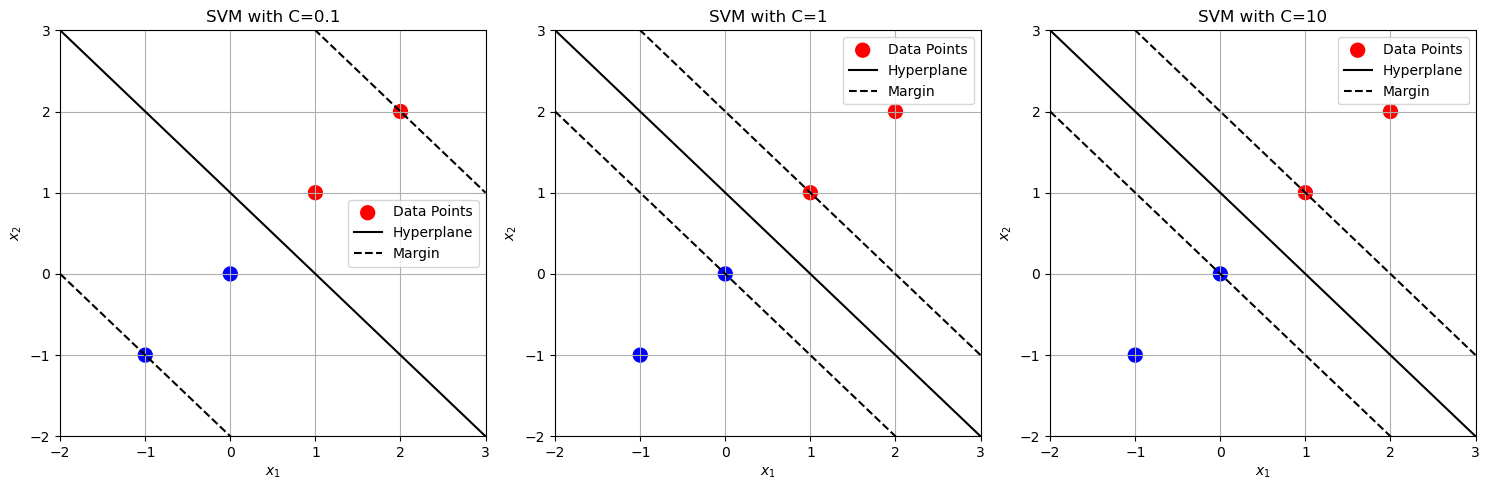

In [4]:
# Buat plot untuk beberapa nilai C
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
C_values = [0.1, 1, 10]
for i, C in enumerate(C_values):
    plot_svm(X, y, C, axes[i], f'SVM with C={C}')
plt.tight_layout()
plt.show()